In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv 

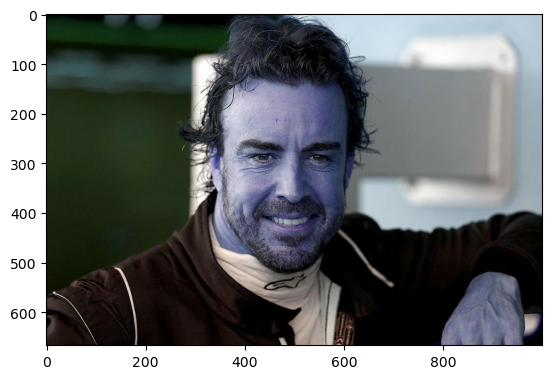

In [34]:
imagen = cv.imread('train/Fernando Alonso/8.jpg')
plt.imshow(imagen)

In [35]:
# Copiamos la imagen para trabajar sobre ella copiada
imagen_copy = np.copy(imagen)

Tenemos 667  pixeles en el eje de las X
Tenemos 1000  pixeles en el eje de las Y


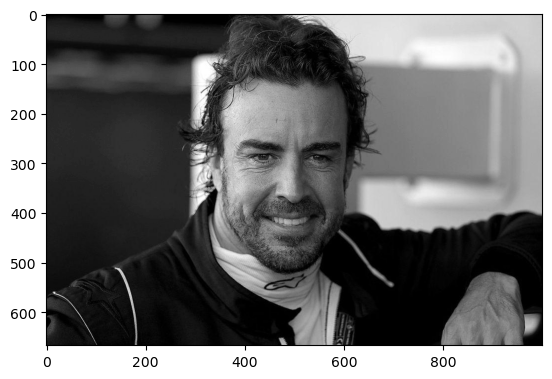

In [36]:
# Convertimos el color a RGB ya que matplotlib, es como mejor la reconoce.
imagen_copy = cv.cvtColor(imagen_copy, cv.COLOR_BGR2GRAY)
print('Tenemos',imagen_copy.shape[0], ' pixeles en el eje de las X')
print('Tenemos',imagen_copy.shape[1], ' pixeles en el eje de las Y')

# Mostramos la imagen 
x = plt.imshow(imagen_copy, cmap='gray')

## Seleccion de pixeles

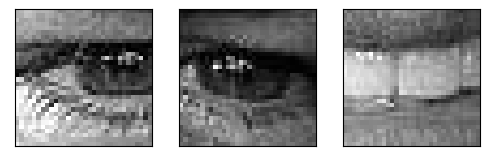

In [6]:
pixeles = [ [290,429], [290,550], [420,500]]

examples = []

for pixel in pixeles:

    #Imagen[desde:hasta, desde:hasta]

    example = imagen_copy[pixel[0]-16:pixel[0]+16,pixel[1]-16:pixel[1]+16]
    examples.append(example)

fig = plt.figure(0,(6,4))

for i, example in enumerate (examples):
    #Dos filas y tres columnas 
    ax = fig.add_subplot(2,3,i+1)
    # Mostra imagen con matplotlib
    ax.imshow(example,cmap='gray', interpolation = 'none', vmin =0, vmax=200)
    ax.set_xticks([])
    ax.set_yticks([])

## Importamos la foto

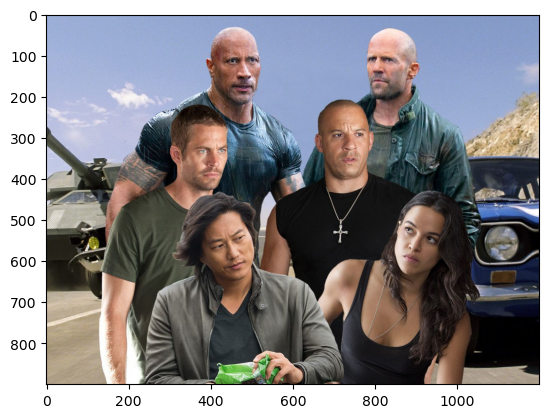

In [73]:
#Cargamos una foto y la convertimos en RGB

img = cv.imread('static/test/23.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)


In [8]:
img.shape

(900, 1200, 3)

## Cambiamos la posición de la foto 

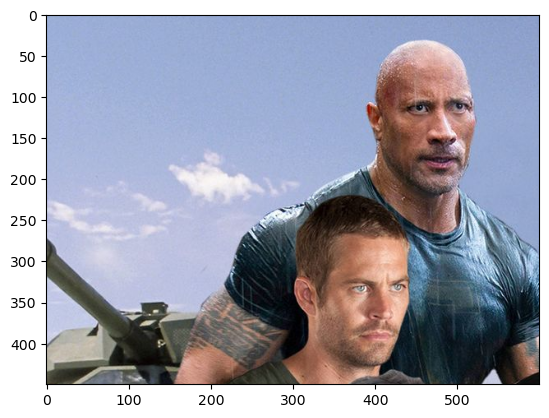

In [9]:
cropped_1 = img[:img.shape[0]//2,:img.shape[1]//2]
plt.imshow(cropped_1)


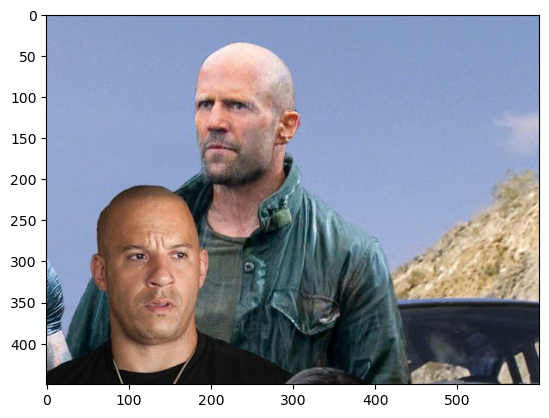

In [10]:
cropped_2 = img[:img.shape[0]//2,img.shape[1]//2:]
plt.imshow(cropped_2)

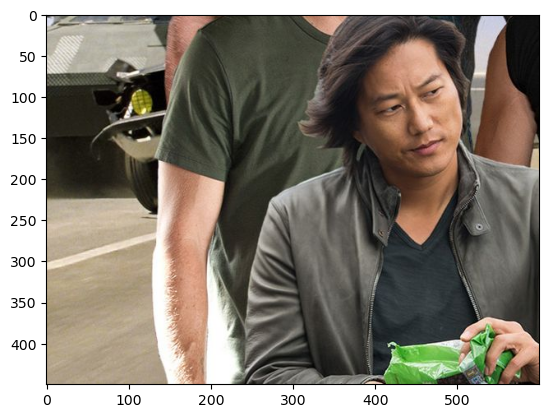

In [11]:
cropped_3 = img[img.shape[0]//2:,:img.shape[1]//2]
plt.imshow(cropped_3)

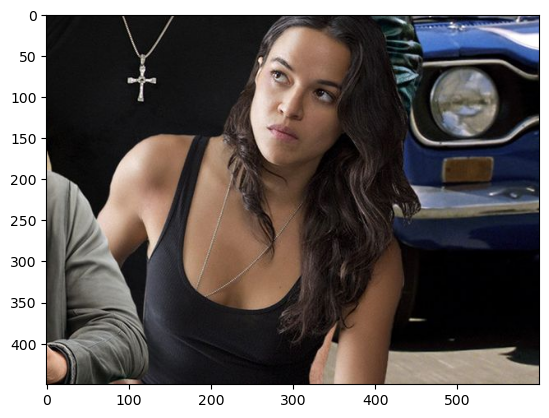

In [12]:
cropped_4 = img[img.shape[0]//2:,img.shape[1]//2:]
plt.imshow(cropped_4)

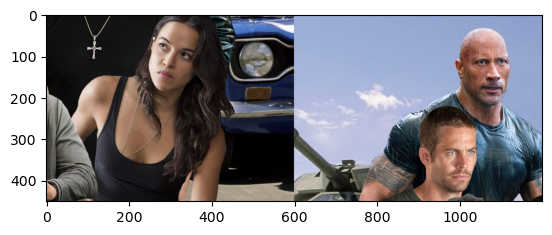

In [13]:
row_1 = cv.hconcat([cropped_4,cropped_1])
plt.imshow(row_1)


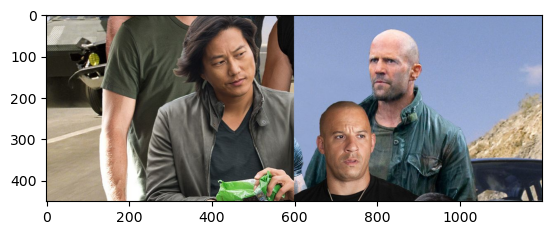

In [14]:
row_2 = cv.hconcat([cropped_3, cropped_2])
plt.imshow(row_2)

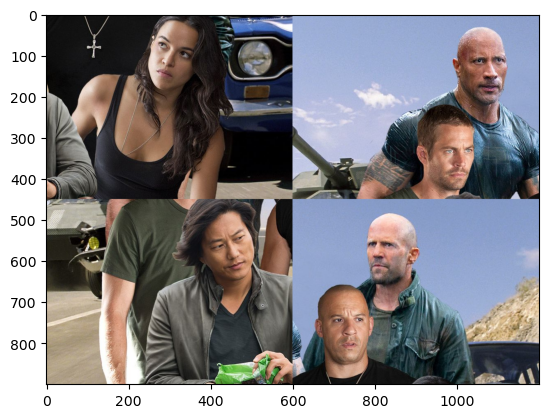

In [15]:
new_img = cv.vconcat([row_1, row_2])
#plt.imshow(new_img,)
plt.imshow(new_img)

## Recorte foto 

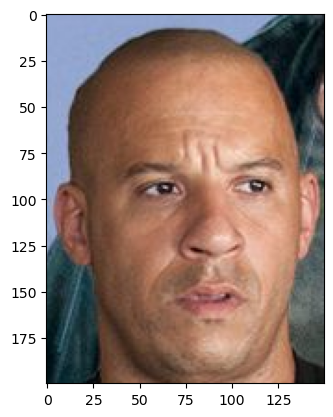

In [75]:
# Seleccionamos un recorte de nuestra foto

#Imagen[desdeY:hastaY, desdeX:hastX]

zona = img[200:400, 650:800]
plt.imshow(zona, cmap='gray')


## Borrosa

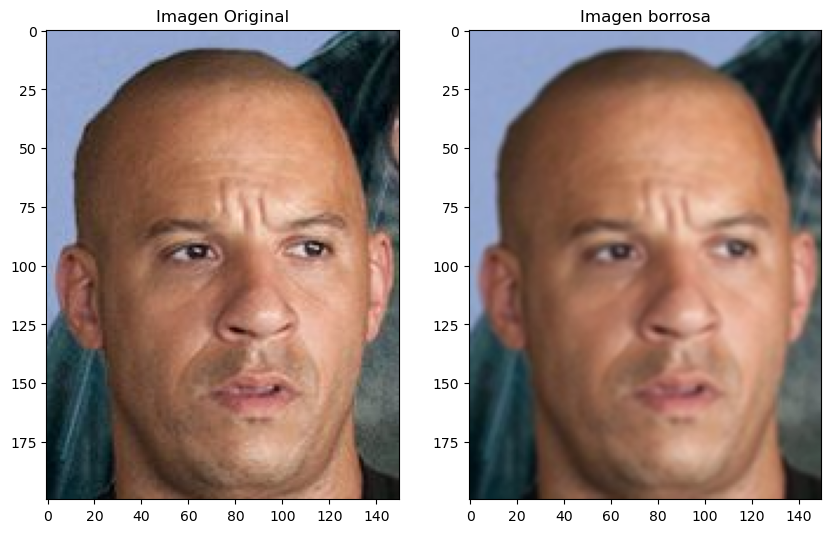

In [17]:
# Hacemos borrosa la imagen y las visualizamos
img_filtered = cv.blur(zona, (3, 3))

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(zona, cmap='gray')

plt.subplot(122)
img_filtered = cv.blur(zona, (3, 3))
plt.title('Imagen borrosa')
plt.imshow(img_filtered)

## Ruido

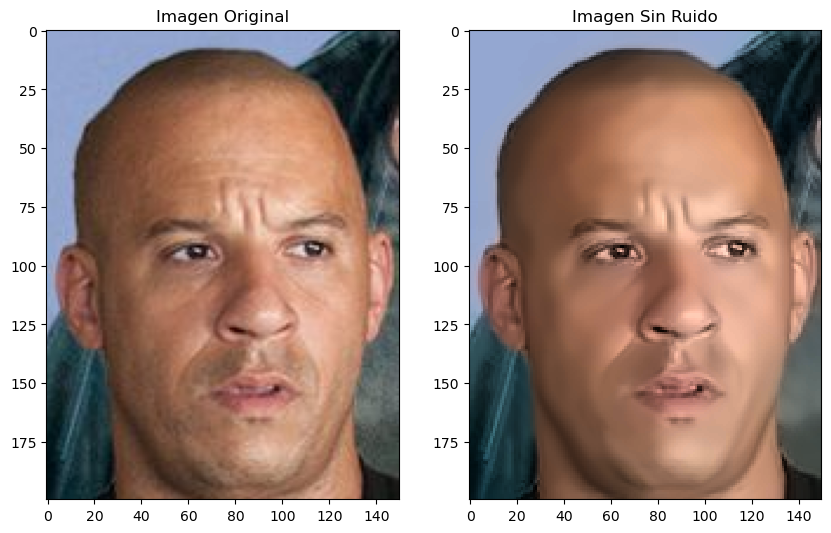

In [18]:
# Destacar o resaltar lineas horizontales

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(zona, cmap='gray')

plt.subplot(122)
#Desnoised=cv.cvtColor(zona, cv.COLOR_BGR2RGB)
Desnoised = cv.fastNlMeansDenoisingColored(zona, None, 5, 10, 7, 21)
plt.title('Imagen Sin Ruido')
plt.imshow(Desnoised, cmap = 'gray', interpolation='none')


In [19]:
zona.shape

(200, 150, 3)

## Rotar

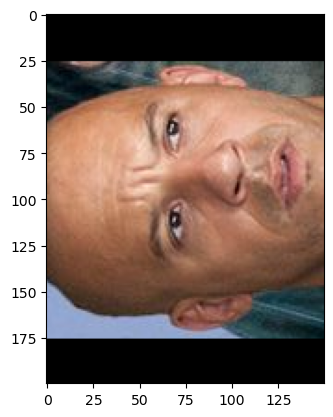

In [67]:
widht = 150
height = 200
centro = (widht/2, height/2)

# cv.getRotationMatrix2D(CENTER, ANGLE, SCALE)
Matrix = cv.getRotationMatrix2D(centro, 90, 1.0)

Rotar = cv.warpAffine(zona, Matrix,(widht, height))
plt.imshow(Rotar)

## Rectangulos y letras

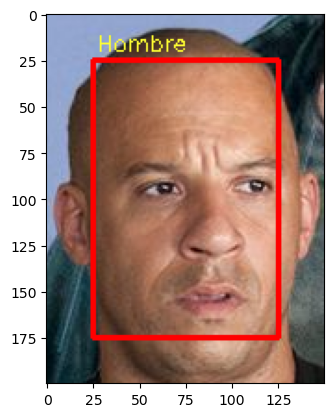

In [76]:
# Colocar el texto 

# cv.putText(imagen, "Texto" punto de inicio(x,y), cv.Font_Italic, escala, color,2)
detectar = np.copy(zona)
cv.putText(detectar,'Hombre', (27,20), cv.FONT_ITALIC,0.4,(255,255,50),1)

#cv.rectangle(imagen(x,y), (x,y), color(255,0,0), grosor)
cv.rectangle(detectar,(25,25),(125,175),(255,0,0),2)

# Mostramos
plt.imshow(detectar)

# Añadir formas

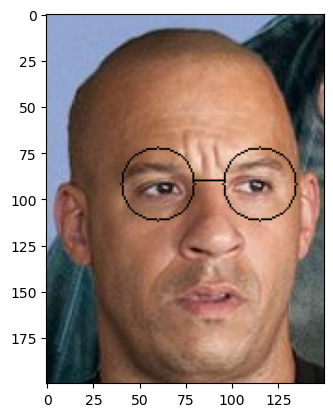

In [77]:
# Vamos a dibujar unas gafas a Vin diesel
gafa = np.copy(zona)
#cv.Circle(imagen, center(x,y), radio, color, grosor)

cv.circle(gafa, (60,92), 20, (0,0,0),1)
cv.circle(gafa, (115,92), 20, (0,0,0),1)

#cv.line(imagen, desde(x,y), hasta(x,y), color, grosor)

cv.line(gafa, (79,90), (96,90),(0,0,0),1)

plt.imshow(gafa)

    # En python se ejcuta mejor el reconocimiento de caras, porque aqui se rompe el kernel

/Users/migueldefrutos/miniconda3/envs/tensorflow/lib/python3.10/site-packages/matplotlib/_api/__init__.py:127: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[173, 172, 172, ..., 153, 153, 153],
       [174, 173, 173, ..., 153, 154, 154],
       [175, 174, 173, ..., 153, 153, 154],
       ...,
       [162, 162, 162, ..., 157, 155, 155],
       [161, 161, 161, ..., 159, 158, 158],
       [160, 160, 161, ..., 158, 158, 159]], dtype=uint8) is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

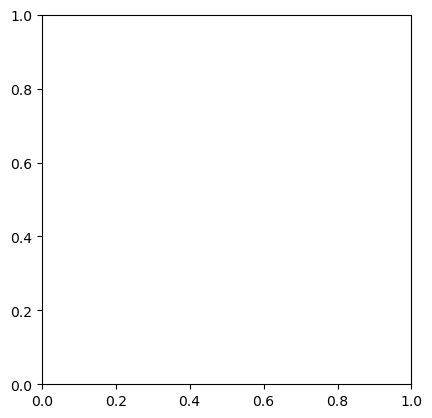

: 

In [4]:
img = cv.imread('static/test/23.jpeg')
cv.imshow('Grupo de 4 personas', img)

#Lo convertimos a gris 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# La aplicamos una reduccion de tamaño
img_small = cv.resize(gray, (800, 400))

#Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered = cv.blur(img_small, (3, 3))

cv.imshow('Personas en gris', img_filtered)

# Aqui llamamos a nuestro modelo entrenado para reconocer caras
haar_cascade = cv.CascadeClassifier('models/haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(img, scaleFactor=1.01, minNeighbors=5, minSize=(50,50))

print(f'Numero de caras = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (255,0,0), thickness=2)

plt.imshow('Caras detectadas', img)
plt.waitKey(0)

## Ejer de reconocimiento de coches

https://www.youtube.com/watch?v=kUMjVo25kX0&t=307s&ab_channel=ElTallerDeTD

## Ejercicio de matriculas bucle for 

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection?select=images

https://www.youtube.com/watch?v=Ai3VmTWeXXk&ab_channel=LuisM